Dataset Preview:
   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  

Confusion Matrix:
[[47 12]
 [12 79]]
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


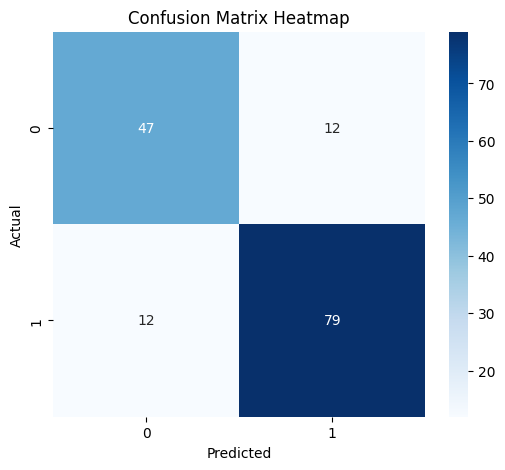

<Figure size 1200x800 with 0 Axes>

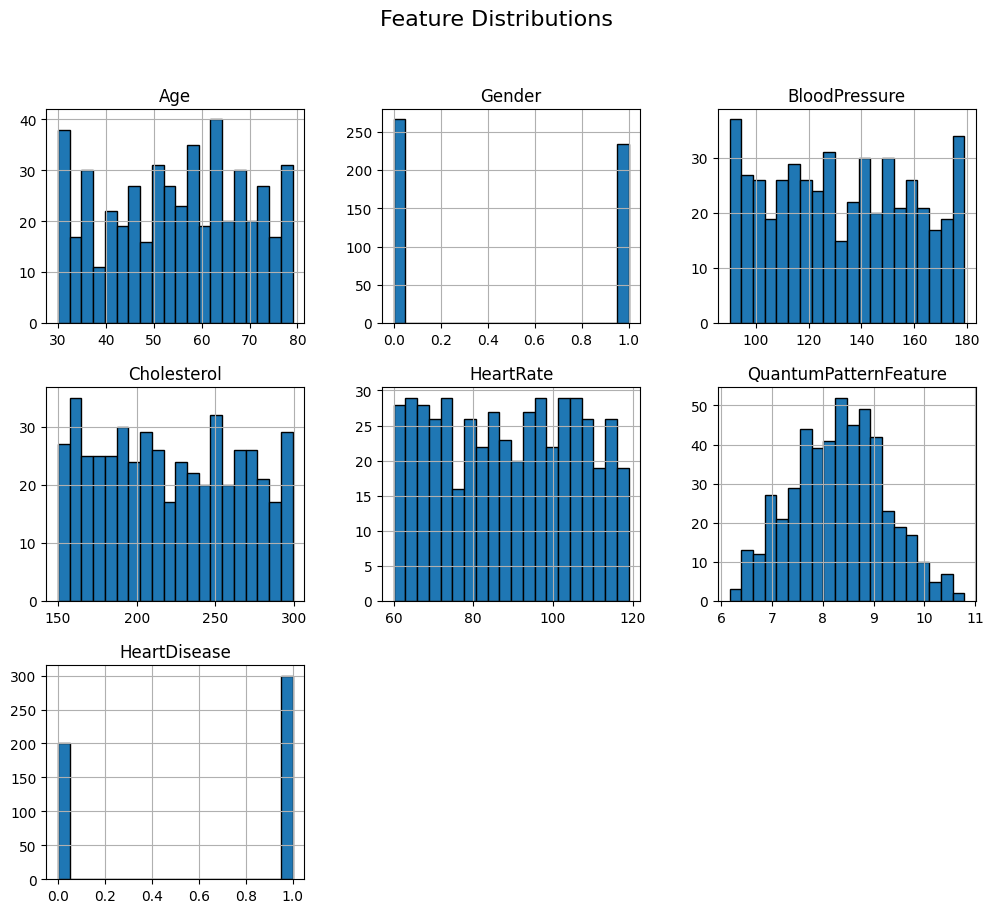

<Figure size 1000x600 with 0 Axes>

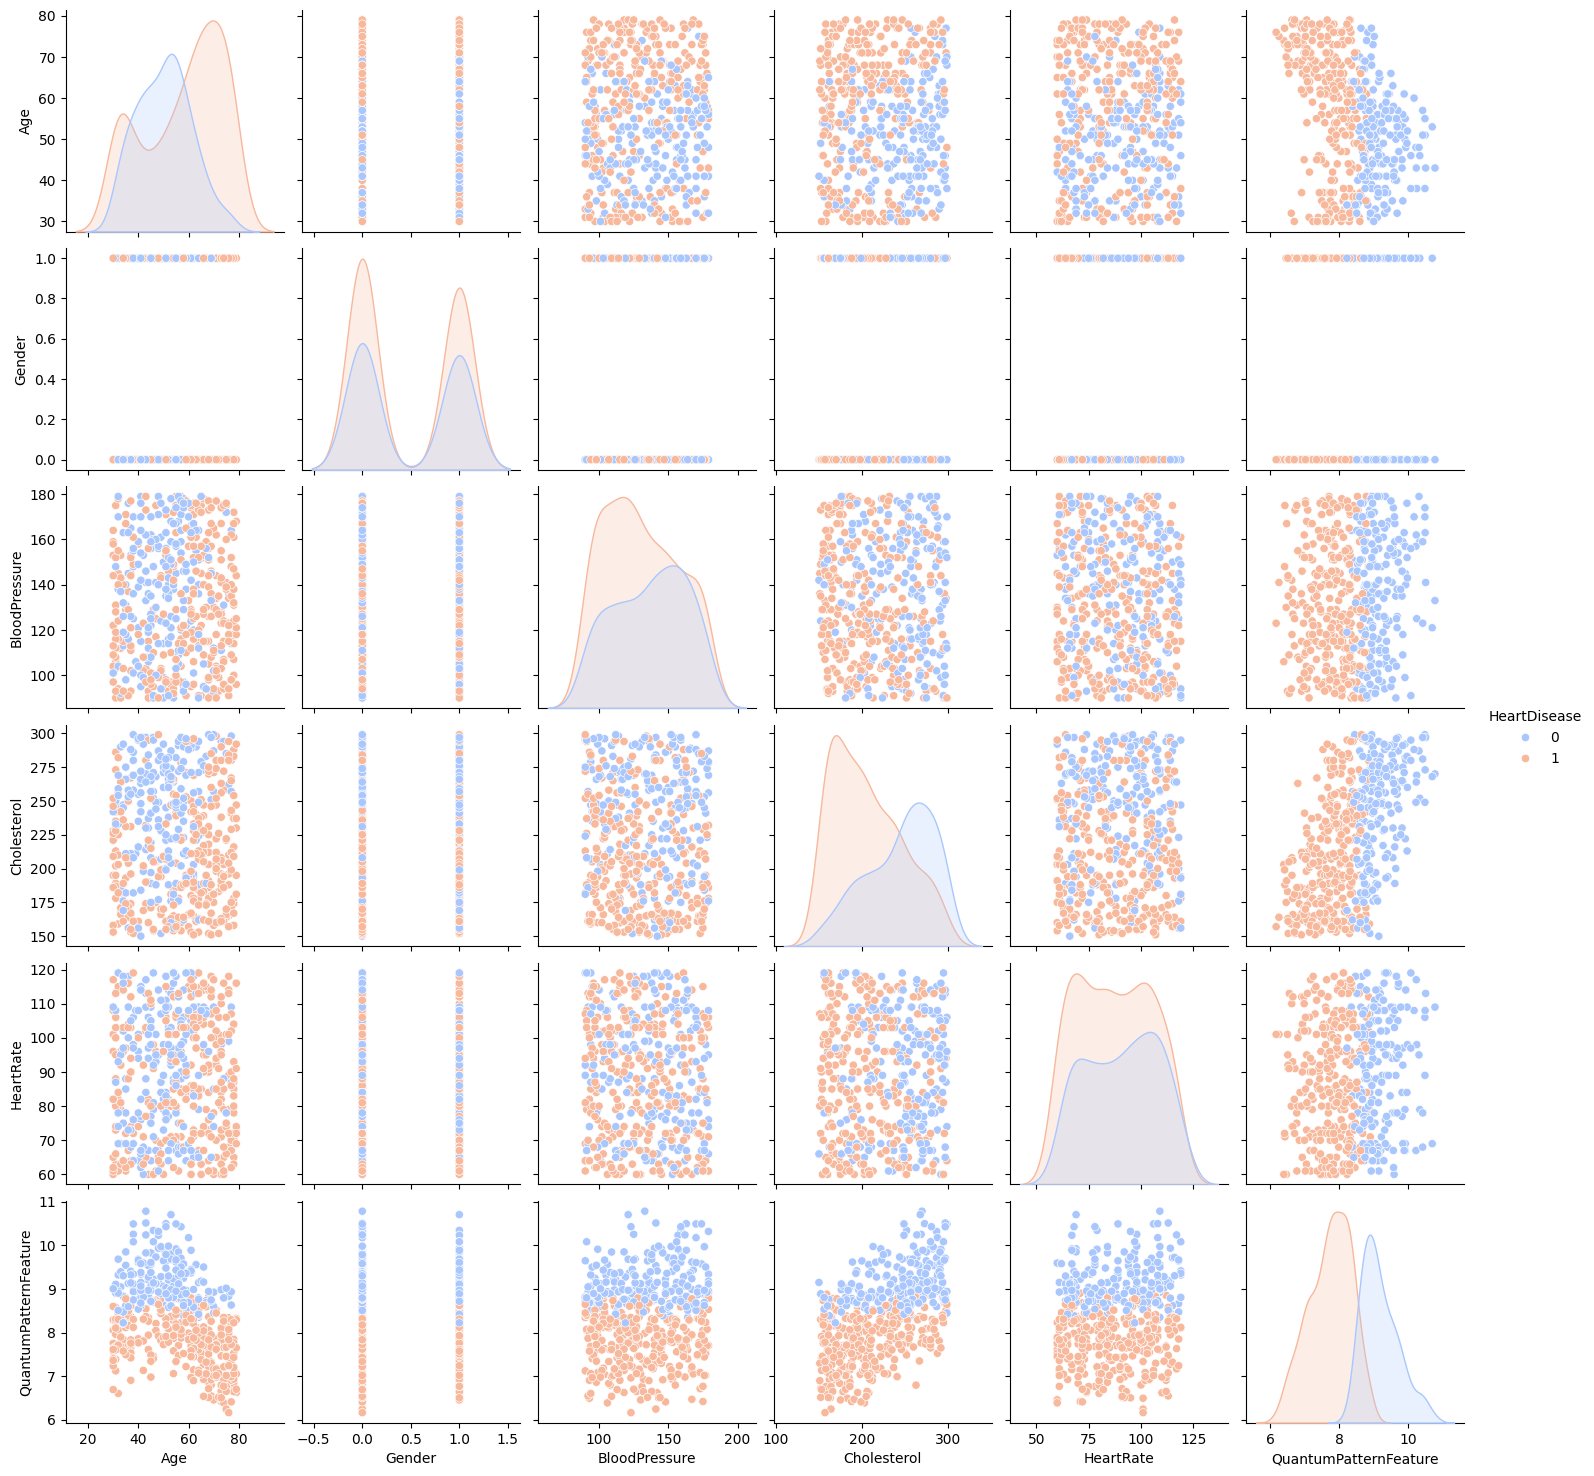

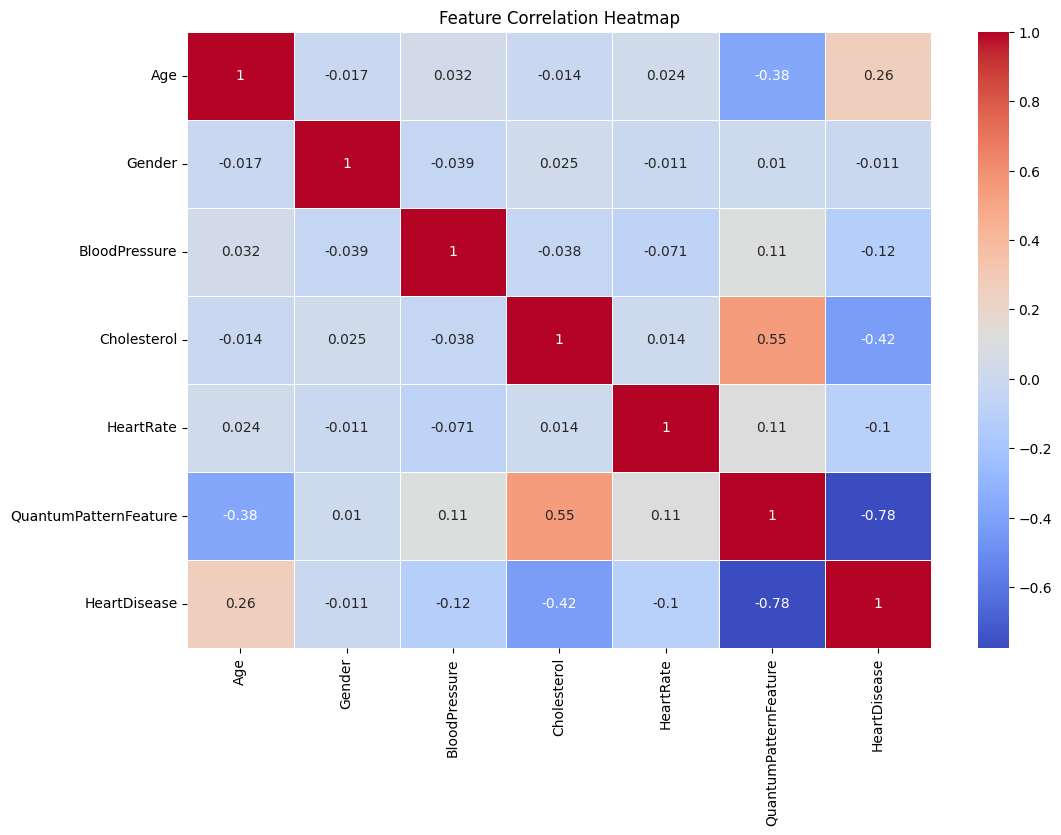

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset upload your file path here or take as user input
path=input()
data = pd.read_csv(path)

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(data.head())

# Check for missing values and handle them
data.fillna(data.mean(), inplace=True)  # Handling missing values by replacing with mean

# Splitting data into features and target variable (Assuming last column is the target)
X = data.iloc[:, :-1]  # All columns except last as features
y = data.iloc[:, -1]   # Last column as target

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (K-NN performs better with normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train K-NN model
k = 5  # Choosing k=5, you can tune this value for better performance
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Create confusion matrix and compute performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Plot dataset distribution
plt.figure(figsize=(12,8))
data.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Pairplot for visualizing relationships between features
plt.figure(figsize=(10,6))
sns.pairplot(data, hue=data.columns[-1], palette='coolwarm')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()